In [233]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import re
import matplotlib.pyplot as plt
import seaborn as sns
import swifter
import contraction
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [234]:
df = pd.read_csv("E:/New/Toxic Comments Classifier/Dataset/data.csv")
df = df.head(50000)

In [235]:
df.shape

(50000, 8)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             50000 non-null  object
 1   comment_text   50000 non-null  object
 2   toxic          50000 non-null  int64 
 3   severe_toxic   50000 non-null  int64 
 4   obscene        50000 non-null  int64 
 5   threat         50000 non-null  int64 
 6   insult         50000 non-null  int64 
 7   identity_hate  50000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 3.1+ MB


In [237]:
df.shape

(50000, 8)

In [238]:
df.rename(columns={"comment_text":"comments"},inplace=True)
df.drop('id',axis = 1,inplace=True)

In [239]:
data_count = df.iloc[:,2:].sum()

In [240]:
data_count

severe_toxic      515
obscene          2645
threat            168
insult           2449
identity_hate     443
dtype: int64

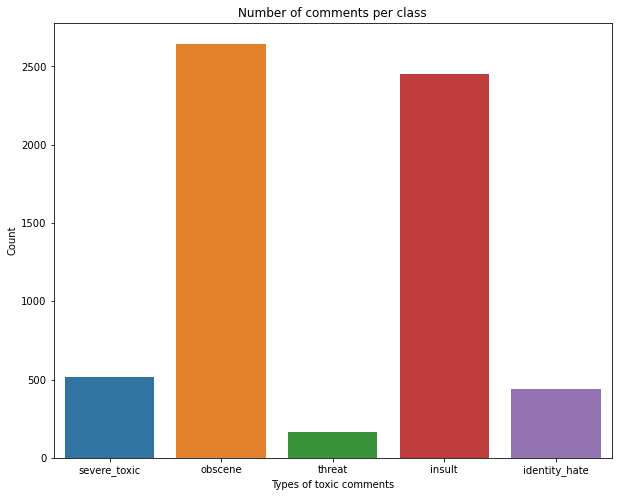

In [241]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data_count.index,data_count.values)
plt.title("Number of comments per class")
plt.xlabel("Types of toxic comments")
plt.ylabel("Count")
plt.show()

In [242]:
df.drop(['severe_toxic','obscene','threat','insult','identity_hate'],axis=1,inplace =True)
df.head(3)

,comments,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0


In [243]:
text = df['comments'][200]
text

'"\n\n Link to Sacramento \n\nI placed a wikipedia-link in this article where the word ""Sacramento"" appears.  Another editor, who appears to be stalking me and is reverting everything that I do, claims that I am ""overlinking"" by doing this.  I have read the policy, and think I understand it, and I disagree with him.  The word ""Sacramento"" was not linked anywhere else in this article before I made the link, and I think that my link provided good context for a reader who did not know Walnut Creek but thought that maybe they knew Sacramento.  Was there anything wrong with my link?  I would like someone objective to give their opinions. 74.234.45.208  "'

In [244]:
text = df['comments'][200]
text

'"\n\n Link to Sacramento \n\nI placed a wikipedia-link in this article where the word ""Sacramento"" appears.  Another editor, who appears to be stalking me and is reverting everything that I do, claims that I am ""overlinking"" by doing this.  I have read the policy, and think I understand it, and I disagree with him.  The word ""Sacramento"" was not linked anywhere else in this article before I made the link, and I think that my link provided good context for a reader who did not know Walnut Creek but thought that maybe they knew Sacramento.  Was there anything wrong with my link?  I would like someone objective to give their opinions. 74.234.45.208  "'

In [245]:
# 1st Function: (lowercase the text)
text = text.lower()
text

'"\n\n link to sacramento \n\ni placed a wikipedia-link in this article where the word ""sacramento"" appears.  another editor, who appears to be stalking me and is reverting everything that i do, claims that i am ""overlinking"" by doing this.  i have read the policy, and think i understand it, and i disagree with him.  the word ""sacramento"" was not linked anywhere else in this article before i made the link, and i think that my link provided good context for a reader who did not know walnut creek but thought that maybe they knew sacramento.  was there anything wrong with my link?  i would like someone objective to give their opinions. 74.234.45.208  "'

In [246]:
# 2nd Function: (Remove digits)
text = re.sub('\d+.','',text)
text

'"\n\n link to sacramento \n\ni placed a wikipedia-link in this article where the word ""sacramento"" appears.  another editor, who appears to be stalking me and is reverting everything that i do, claims that i am ""overlinking"" by doing this.  i have read the policy, and think i understand it, and i disagree with him.  the word ""sacramento"" was not linked anywhere else in this article before i made the link, and i think that my link provided good context for a reader who did not know walnut creek but thought that maybe they knew sacramento.  was there anything wrong with my link?  i would like someone objective to give their opinions.  "'

In [247]:
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [248]:
c_re = re.compile('(%s)' % '|'.join(cList.keys()))

In [249]:
# 3rd Function: (expantion of contractions)
def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [250]:
df['comments'] = df['comments'].apply(expandContractions)

In [251]:
df['comments'].head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I am ...
2    Hey man, I am really not trying to edit war. I...
3    "\nMore\nI cannot make any real suggestions on...
4    You, sir, are my hero. Any chance you remember...
Name: comments, dtype: object

In [252]:
text = ' '.join(re.findall('\w+',text))
text

'link to sacramento i placed a wikipedia link in this article where the word sacramento appears another editor who appears to be stalking me and is reverting everything that i do claims that i am overlinking by doing this i have read the policy and think i understand it and i disagree with him the word sacramento was not linked anywhere else in this article before i made the link and i think that my link provided good context for a reader who did not know walnut creek but thought that maybe they knew sacramento was there anything wrong with my link i would like someone objective to give their opinions'

In [253]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\d+.','',text)
    text = ' '.join(re.findall('\w+',text))
    return text

In [254]:
df['comments'] = df['comments'].swifter.apply(clean_text) # Applying the function to whole dataset

Pandas Apply:   0%|          | 0/50000 [00:00<?, ?it/s]

In [255]:
X = df['comments']
Y = df['toxic']

In [256]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import classification_report

In [257]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.20, random_state=420)

In [258]:
vect = CountVectorizer(min_df = 0.0002,max_df=0.7)

In [259]:
vect.fit(xtrain)

CountVectorizer(max_df=0.7, min_df=0.0002)

In [260]:
vect.fit(xtest)

CountVectorizer(max_df=0.7, min_df=0.0002)

In [261]:
m = vect.transform(xtrain)
n = vect.transform(xtest)

In [262]:
x_train = m.toarray()
x_test = n.toarray()

In [263]:
lrm = LogisticRegression()
lrm.fit(x_train,ytrain)

LogisticRegression()

In [264]:
y_train_proba = lrm.predict_proba(x_train)
y_test_proba = lrm.predict_proba(x_test)

In [265]:
print('Train')
print(classification_report(ytrain,lrm.predict(x_train)))
print('Test')
print(classification_report(ytest,lrm.predict(x_test)))

Train
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     36083
           1       0.97      0.81      0.88      3917

    accuracy                           0.98     40000
   macro avg       0.97      0.90      0.93     40000
weighted avg       0.98      0.98      0.98     40000

Test
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9034
           1       0.84      0.67      0.75       966

    accuracy                           0.96     10000
   macro avg       0.90      0.83      0.86     10000
weighted avg       0.95      0.96      0.95     10000



#### Model :

In [266]:
data = input("Enter the Comment You want to examine :")

Enter the Comment You want to examine :It is a beautiful piece of art.#samshersing ❤️


In [267]:
data = expandContractions(data)

In [268]:
data

'It is a beautiful piece of art.#samshersing ❤️'

In [269]:
data = clean_text(data)

In [270]:
data

'it is a beautiful piece of art samshersing'

In [271]:
vector = vect.transform([data])

In [272]:
vector

<1x14099 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [273]:
vect1 = vect.transform([data])

In [274]:
vect1

<1x14099 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [275]:
lrm.predict(vect1)

array([0], dtype=int64)

In [276]:
import pickle

In [277]:
pickle.dump(vect,open("E:/New/Toxic Comments Classifier/Deployment/Model Files/vector.sav","wb"))

In [278]:
pickle.dump(lrm,open("E:/New/Toxic Comments Classifier/Deployment/Model Files/classifier.sav","wb"))

In [280]:
vector = pickle.load(open("E:/New/Toxic Comments Classifier/Deployment/Model Files/vector.sav","rb"))
classifier = pickle.load(open("E:/New/Toxic Comments Classifier/Deployment/Model Files/classifier.sav","rb"))

In [299]:
data = input("Enter the Comment You want to examine :")

Enter the Comment You want to examine :It is a beautiful piece of art.#samshersing ❤️


In [300]:
data = expandContractions(data)

In [301]:
data

'It is a beautiful piece of art.#samshersing ❤️'

In [302]:
data = clean_text(data)
data

'it is a beautiful piece of art samshersing'

In [303]:
v = vect.transform([data])

In [305]:
prediction = lrm.predict(v)

In [306]:
final = prediction[0]

In [307]:
final

0